<a href="https://colab.research.google.com/github/dedemasutti/Machine-Learning/blob/main/Machine_learning_aplicado_a_RH_(Churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas e carregando o dataset no pandas

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando o arquivo .csv no pandas
data = pd.read_csv('/content/employee_churn_dataset.csv')

## Explorando os dados

In [2]:
data.head()

,id,avaliacao_desempenho,satisfacao_trabalho,salario,tempo_servico,churn
0,1,0.75,0.8,6000,2,0
1,2,0.90,0.7,8000,4,0
2,3,0.60,0.6,5000,1,1
3,4,0.85,0.5,7500,3,0
4,5,0.70,0.9,7000,2,1


In [3]:
data.describe()

,id,avaliacao_desempenho,satisfacao_trabalho,salario,tempo_servico,churn
count,30.000000,30.0000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,0.7970,0.700000,7076.666667,3.000000,0.300000
std,8.803408,0.0990,0.143839,1380.825174,1.485563,0.466092
min,1.000000,0.6000,0.500000,5000.000000,1.000000,0.000000
25%,8.250000,0.7350,0.600000,6000.000000,2.000000,0.000000
50%,15.500000,0.7950,0.700000,7000.000000,3.000000,0.000000
75%,22.750000,0.8775,0.800000,8075.000000,4.000000,1.000000
max,30.000000,0.9600,0.900000,9800.000000,6.000000,1.000000


## Visualização com seaborn

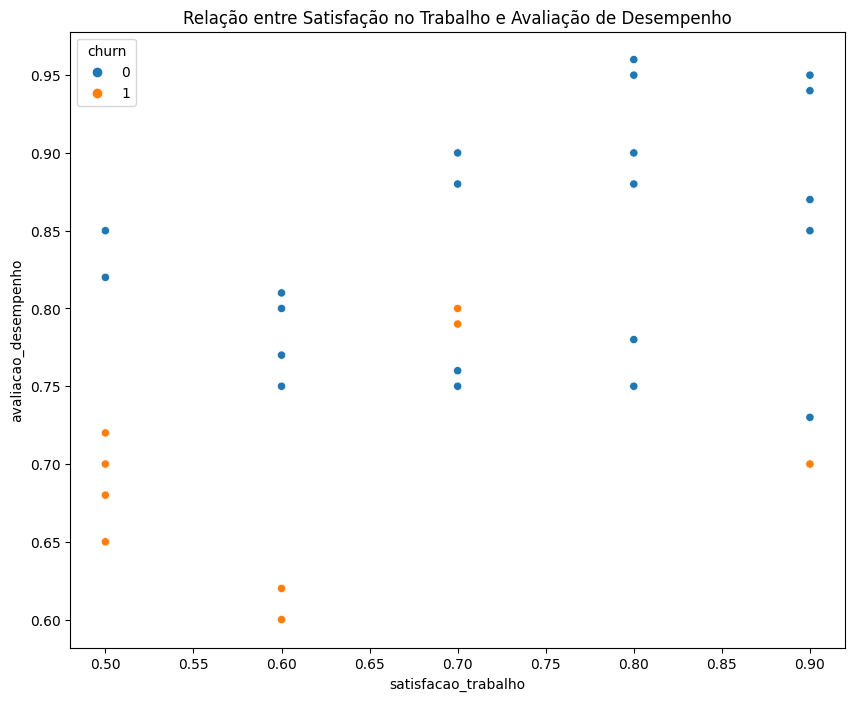

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='satisfacao_trabalho', y='avaliacao_desempenho', data=data, hue='churn')
plt.title('Relação entre Satisfação no Trabalho e Avaliação de Desempenho')
plt.show()

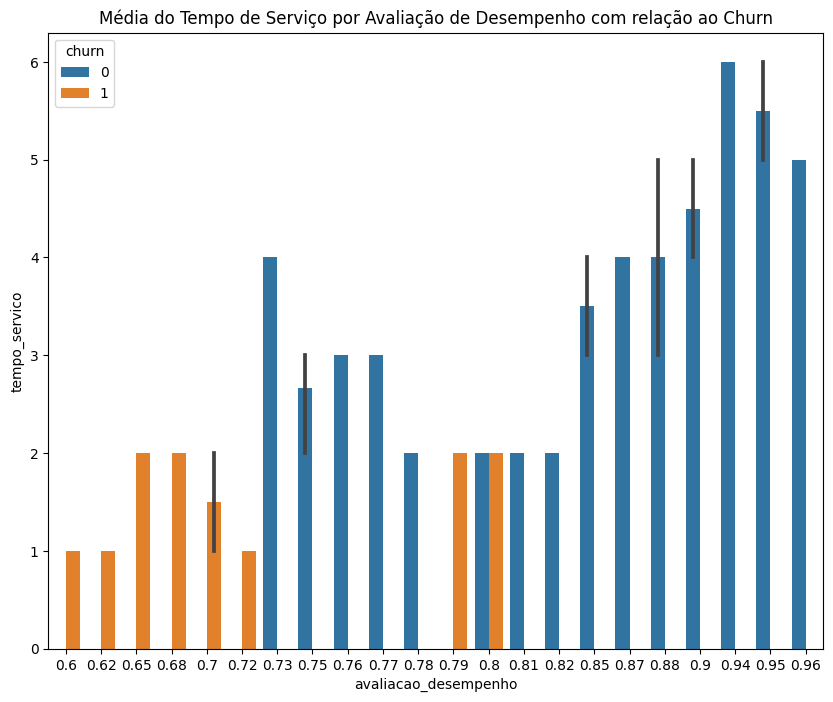

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(x='avaliacao_desempenho', y='tempo_servico', data=data, hue='churn')
plt.title('Média do Tempo de Serviço por Avaliação de Desempenho com relação ao Churn')
plt.show()

## Modelo de Machine Learning com o algoritmo Random Forest

In [4]:
# Preparação dos dados (X são as features e y é a variável alvo)
X = data.drop('churn', axis=1)
y = data['churn']

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo com ajuste do hiperparâmetro min_samples_split
model = RandomForestClassifier(n_estimators=100, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo: {accuracy:.2f}')

# Relatório de classificação
print(classification_report(y_test, y_pred))

Acurácia do Modelo: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

